####데이터셋 불러오기

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



###데이터셋을 순회하고 시각화하기

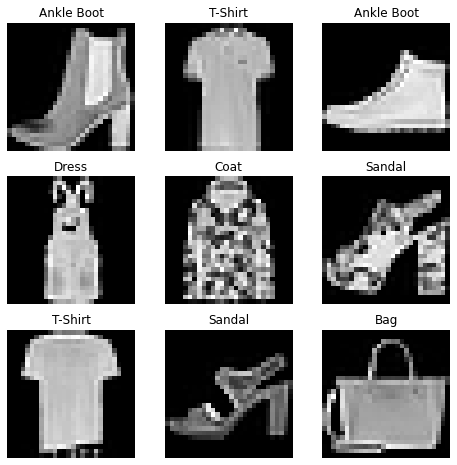

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows +1):
    # 훈련 데이터의 크기까지의 랜덤정수 하나를 .item()을 이용해서 number형태로 반환
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  # squeeze()를 이용해서 size 1인 차원 없에기
plt.show()

###파일에서 사용자 정의 데이터셋 만들기

- Dataset은 이미지와 해당 샘플의 label을 지정하는 역할을 함

Customized Dataset 클래스는 반드시 3개의 함수를 구현해야 함

- __ init __
    - 생성자
    - 이미지 path, 훈련 모드 등 필요한 param 전달
- __ len __
    - 데이터의 갯수
- __ getitem __
    - img_path와 idx를 기반으로 이미지 불러오기
    - img, label을 반환

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        # csv파일 읽어서 레이블 저장
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # path 설정
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])

        # path를 이용한 이미지와 레이블 불러오기
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        if self.transform:  # Train
            image = self.transform(image)
        if self.target_transform:   # Test
            label = self.target_transform(label)
        return image, label

In [5]:
# 이상치 탐지 알고리즘 대회 시 사용했던 Dataset
class Custom_dataset(Dataset):
    # 생성자
    def __init__(self, img_paths, labels, mode='train'):
        self.img_paths = img_paths
        self.labels = labels
        self.mode=mode

    # 길이
    def __len__(self):
        return len(self.img_paths)
    
    # item 가져오기
    def __getitem__(self, idx):
        # 인덱스로 img 불러오기
        # 여기서는 생성자의 img_paths가 이미지들의 리스트로 전달되어야 함
        img = self.img_paths[idx]

        if self.mode=='train':  # train
            img = train_transform(image=img)
        if self.mode=='test':   # test
            img = test_transform(image=img)
        
        label = self.labels[idx]
        return img, label

###DataLoader로 학습용 데이터 준비하기

- DataLoader는 필요에 따라 데이터셋을 iterate 함

In [7]:
from torch.utils.data import DataLoader

# training_data, test_data를 순회하는 DataLoader 생성
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


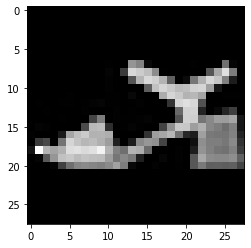

Label: 5


In [11]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [12]:
type(train_features)

torch.Tensor

In [14]:
train_labels

tensor([5, 5, 4, 5, 5, 9, 9, 3, 5, 6, 3, 6, 8, 9, 1, 9, 5, 6, 5, 5, 9, 2, 8, 1,
        8, 0, 3, 4, 6, 9, 0, 1, 3, 7, 0, 2, 8, 6, 9, 2, 3, 5, 3, 9, 8, 5, 3, 1,
        6, 3, 8, 8, 4, 4, 1, 8, 9, 6, 8, 4, 9, 3, 1, 2])